In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
T = 1.0
N_t = 100
t_grid = np.linspace(0, T, N_t)

N_x = 100
x_grid = np.linspace(-1, 1, N_x)

N_modes = 50
alpha = np.arange(1, N_modes+1)  # simple increasing

# Mock bounded functions
def Psi(x, t, i):
    return np.sin(x * i) * np.cos(t)  # bounded

def W_tilde(i, j):
    return np.exp(-(i-j)**2)  # Gaussian, bounded

def theta(i, j):
    return (i+j)*np.pi/4  # arbitrary phase

def h_t_dot(x, t, i):
    # some bounded derivative mock
    return 0.1*np.cos(x*i)*np.sin(t)

S_approx = 0.0
for ti in t_grid:
    for x in x_grid:
        accum = 0.0
        for i in range(N_modes):
            # Approximate W_ij cos(theta_ij) by just W_ii for simplicity
            val = Psi(x, ti, i+1) + W_tilde(i+1, i+1)*np.cos(theta(i+1, i+1))
            val -= 0.5*0.1*(h_t_dot(x, ti, i+1)**2)  # tau = 0.1 for example
            accum += np.exp(-alpha[i]*val)
        S_approx += accum
S_approx /= (N_t*N_x)  # crude approximation of integral average

print("Approximate S:", S_approx)


Approximate S: 2.4087769536840972e+41


In [2]:
def theta_wave(t, freq=5):
    """
    Generate a theta wave for time marking.
    freq: Frequency in Hz (theta typically 4-8 Hz).
    """
    return np.sin(2 * np.pi * freq * t)

In [3]:
def wave_interference_with_theta(t, stored_pattern, new_pattern, theta_freq=5):
    """
    Simulate wave interference with theta wave modulation.
    """
    theta = theta_wave(t, freq=theta_freq)
    interference = stored_pattern - new_pattern
    residual = np.abs(interference)  # Filter dissimilarities
    
    # Apply theta wave as a marker
    theta_marked_residual = residual * theta
    return residual, theta_marked_residual

In [4]:
def visualize_wave_interference(t, stored, new, residual, theta_marked):
    plt.figure(figsize=(10, 6))
    plt.plot(t, stored, label="Stored Pattern", alpha=0.7)
    plt.plot(t, new, label="New Pattern", alpha=0.7)
    plt.plot(t, residual, label="Residual (Filtered)", linestyle="--")
    plt.plot(t, theta_marked, label="Theta-Marked Residual", linestyle=":")
    plt.legend()
    plt.title("Wave Interference with Theta Wave Marking")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

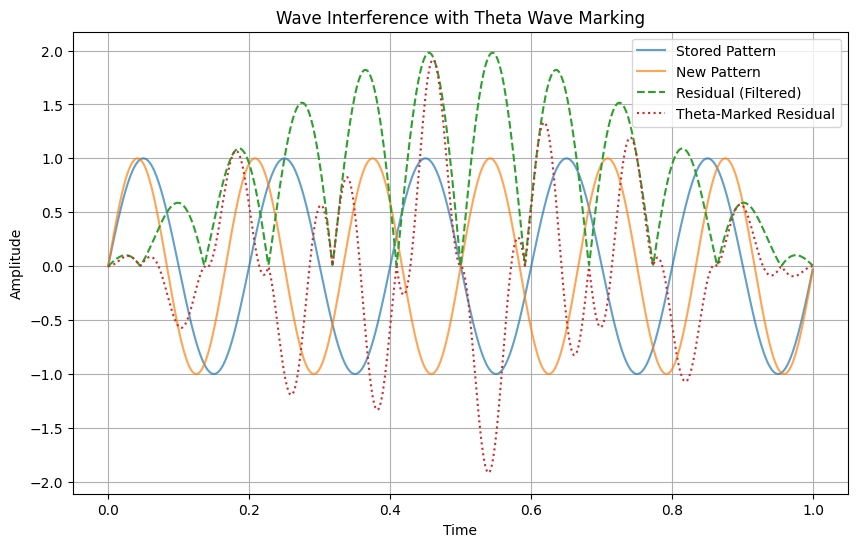

In [5]:
# Example Test Case
if __name__ == "__main__":
    # Generate time vector
    fs = 1000  # Sampling frequency
    duration = 1.0  # 1 second
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    
    # Example stored and new patterns (sine waves with slight differences)
    stored_pattern = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave
    new_pattern = np.sin(2 * np.pi * 6 * t)    # 6 Hz sine wave
    
    # Simulate wave interference with theta marking
    residual, theta_marked_residual = wave_interference_with_theta(t, stored_pattern, new_pattern, theta_freq=7)
    
    # Visualize results
    visualize_wave_interference(t, stored_pattern, new_pattern, residual, theta_marked_residual)